Bag of n-grams is a text representation technique in NLP that uses a group of words to vectorize a given text. Bag of words is a particular case of bag of n-grams (with n=1).how bag of n-grams work along with coding in spacy and sklearn.

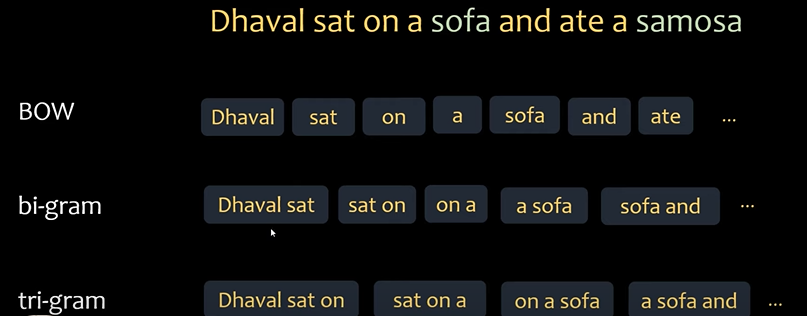

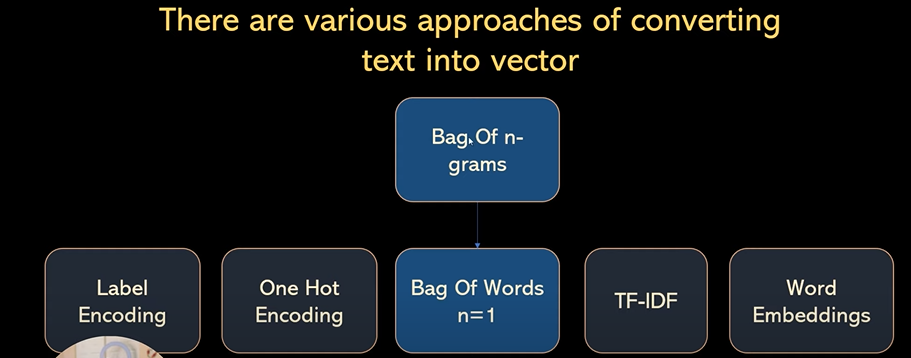

In [1]:
# bag of n-grams demo using sklearn CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [2]:
v = CountVectorizer(ngram_range= (2,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_
# creates a pair

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [3]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

# bi gram

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [4]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

# tri-gram

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [5]:
corpus = {
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"

}

preprocess them to remove stop words, lemmatize etc and then generate bag of 1 grams and 2 grams from it

In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  # remove stop words and lemmatize the text

  doc = nlp(text)

  filtered_tokens = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)

  return " ".join(filtered_tokens)

In [7]:
preprocess("Thor ate pizza")


'Thor eat pizza'

In [8]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [9]:
corpus_preprocessed = [preprocess(text) for text in corpus]
corpus_preprocessed

['Loki tall', 'Thor eat pizza', 'Loki eat pizza']

In [10]:
# using a countvectorizer
v = CountVectorizer(ngram_range= (1,2))
v.fit(corpus_preprocessed)
# fit gives the vocabulary
v.vocabulary_

{'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki eat': 3}

Now generate bag of n gram vector for few sample documents

In [11]:
v.transform(["Thor ate pizza"]).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 1, 0]], dtype=int64)

Let's take a document that has out of vocabulary (OOV) term and see how bag of ngram generates vector out of it

In [12]:
v.transform(["Hulk ate pizza"]).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

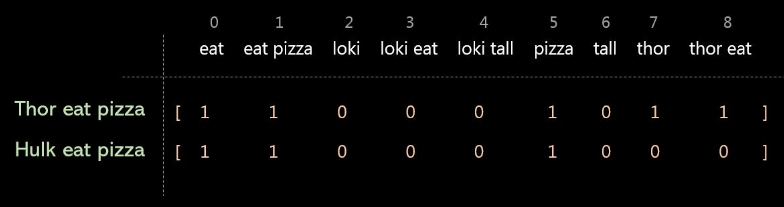

**News Category Classification Problem**

use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1. BUSINESS 

2. SPORTS

3. CRIME

4. SCIENCE

Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

In [13]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73049 sha256=dd40113e7fa28352bc4cabf1dc5317673a392d89c32d0ae8f6f1daf6bc5bffb9
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [14]:
# !mkdir ~/.kaggle

In [15]:
# !cp kaggle.json ~/.kaggle/

In [16]:
# !chmod 600 ~/.kaggle/kaggle.json

In [17]:
# ! kaggle datasets download -d rmisra/news-category-dataset

In [18]:
# !unzip news-category-dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
#  import dataset
import pandas as pd

df = pd.read_json("news_dataset.json")
print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [20]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

the dataset is imbalanced 

As you can see above, SCIENCE category has almost 1/3rd data samples compared to BUSINESS and SPORTS categories

handle this using undersampling....

In [22]:
min_samples = 1381

df_business = df[df.category=='BUSINESS'].sample(min_samples, random_state= 2022)
df_sports = df[df.category=='SPORTS'].sample(min_samples, random_state= 2022)
df_crime = df[df.category=='CRIME'].sample(min_samples, random_state= 2022)
df_science = df[df.category=='SCIENCE'].sample(min_samples, random_state= 2022)

In [23]:
# BALANCED DATASET 
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science], axis = 0)
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [24]:
df_balanced.head()

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS


Convert text category to a number

In [25]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced.category.map(target)

df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


**no pre_processing**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced.text, df_balanced.category_num, test_size= 0.2, random_state= 2022, stratify= df_balanced.category_num)

In [27]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [28]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [29]:
y_train.value_counts()


3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

naive bayes recommended for text based problems

In [35]:
#1. create a pipeline object
clf =  Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


y_pred[0:5]

array([0, 3, 3, 0, 2], dtype=int64)

In [37]:
X_test[:5]


3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [42]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



Use 1-gram and bigrams

In [43]:
#1. create a pipeline object
clf =  Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range= (1,2))),
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


y_pred[0:5]

array([0, 0, 3, 0, 2], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



Use 1-gram to trigrams

In [47]:
#1. create a pipeline object
clf =  Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range= (1,3))),
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


y_pred[0:5]

array([0, 0, 3, 0, 2], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [49]:
df_balanced['pre_process_text']  = df_balanced['text'].apply(preprocess)

In [51]:
df_balanced.head()

,text,category,category_num,pre_process_text
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,gcc business leader remain confident face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks talk give build ...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage Intuition decision make feel safe rel...


create and train  model

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced.pre_process_text, df_balanced.category_num, test_size= 0.2, random_state= 2022, stratify= df_balanced.category_num)

In [53]:
print(X_train.shape)
X_train.head()


(4419,)


7589     ovulate Women Prefer Images Penetration Images...
10442     scientist discover Spooky Influence Baby Choices
8792     Olympic Race Walker step propose boyfriend Rio...
1733     beloved Bipedal Bear Named Pedals Believed kil...
2526       Elizabeth Smart give Birth Baby Girl Father say
Name: pre_process_text, dtype: object

In [54]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [55]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [56]:
#1. create a pipeline object
clf =  Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range= (1,3))),
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


y_pred[0:5]

array([0, 3, 3, 0, 2], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       276
           1       0.94      0.82      0.87       277
           2       0.83      0.92      0.87       276
           3       0.92      0.81      0.86       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105




Plot confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[246,   8,  15,   7],
       [ 12, 227,  30,   8],
       [ 16,   2, 253,   5],
       [ 39,   5,   8, 224]], dtype=int64)

Text(69.0, 0.5, 'Truth')

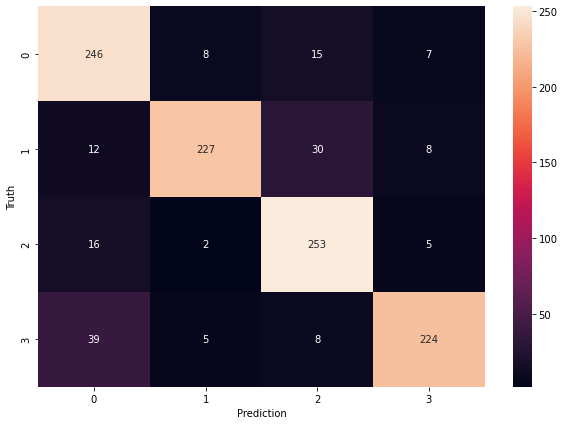

In [59]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')